# Фильтрация изображений

In [100]:
from skimage.io import imread, imshow,imsave
from skimage.transform import resize
from numpy import clip
from numpy import dstack
from numpy import array_equal
import numpy as np
from skimage.util import img_as_ubyte,img_as_float
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb
from scipy.signal import convolve2d

In [5]:
img = np.array([[0, -8, -3, -2], 
                [1, 9, -8, 0], 
                [9, -4, 5, -9], 
                [6, -4, 6, 3]])

kernel = np.array([[4, -5, 4], 
                   [-6, -8, -2], 
                   [1, 5, 5]])

In [6]:
def conv(array, window):
    window_size=int(window.shape[0])
    center=int(np.floor(window_size/2))

    new_array=np.zeros((array.shape[0], array.shape[1]), dtype=np.int)
    for i in range(center, array.shape[0]-center):
        for j in range(center, array.shape[1]-center):
                new_array[i,j]=(array[i-center:i+center+1,j-center:j+center+1]*window).sum()
    new_array=new_array[center:array.shape[0]-center,center:array.shape[1]-center]
    return new_array

In [4]:
conv(img,kernel)

array([[-20, -39],
       [-89, 119]])

### Box-фильтр.

Реализуйте box-фильтрацию изображения окном 5×5 пикселей. Дополнять изображение не нужно (т.е. изображение после фильтрации уменьшится). Прочитайте изображение из файла img.png и сохраните результат фильтрации в файл out_img.png. 

В примере входа и выхода указаны ссылки на файлы. Скачав эти файлы, можно протестировать свою программу. Для сравнения вашего ответа с верным используйте функцию numpy.array_equal.

In [15]:
img=imread('https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


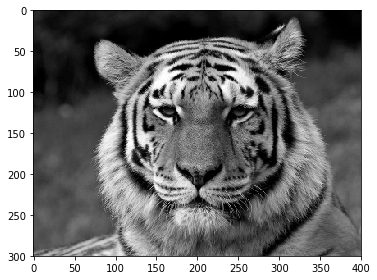

In [16]:
imshow(img)

In [26]:
window_size=5

img_new = np.zeros((img.shape[0]-window_size+1, img.shape[1]-window_size+1), dtype=np.int)

for i in range (img.shape[0]-window_size+1):
    for j in range (img.shape[1]-window_size+1):
        a = 0
        for k in range (window_size):
            for n in range (window_size):
                a = a + img[i + k, j + n]
        img_new [i, j] = int (a / window_size**2)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


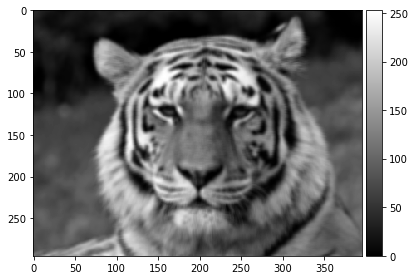

In [30]:
imshow(img_new,cmap='gray')

In [31]:
img2 = imread("https://stepik.org/media/attachments/lesson/61037/box-tiger.png")
np.array_equal(img_new, img2)

True

### На вход подаются три числа: σ, x, y. Подсчитайте значение функции Гаусса в этой точке.

In [32]:
def Gauss(sigma,x,y):
    result = np.e**((-x**2 - y**2)/(2*sigma**2))/(2*np.pi*sigma**2)
    return result

In [33]:
Gauss(1,1,1)

0.05854983152431917

### Ядро гауссовского фильтра

На стандартный вход подается параметр σ гауссовского фильтра. Подсчитайте и напечатайте на стандартый вывод элементы ядра. Для подсчета значений функции Гаусса используйте функцию из предыдущего задания. σ может быть нецелым, тогда округлите K с помощью функции round. Элементы ядра выводите с 5 цифрами после запятой.

In [34]:
def get_kernel(sigma):
    k = int(np.ceil(3*sigma))

    kernel = np.array([[Gauss(sigma,x, y) for x in range(-k, k+1)] for y in range(-k, k+1)])

    return kernel / np.sum(kernel, axis=(0,1))

In [35]:
get_kernel(0.33)

array([[9.87532107e-05, 9.73995858e-03, 9.87532107e-05],
       [9.73995858e-03, 9.60645153e-01, 9.73995858e-03],
       [9.87532107e-05, 9.73995858e-03, 9.87532107e-05]])

In [36]:
print('\n'.join([' '.join(['{:.5f}'.format(item) for item in row]) for row in get_kernel(0.33)]))

0.00010 0.00974 0.00010
0.00974 0.96065 0.00974
0.00010 0.00974 0.00010


### Гауссовская фильтрация.

Профильтруйте изображение гауссовским ядром с σ=0.66. Для подсчета ядра используйте функцию из предыдущего задания. При подсчете новых значений изображения не забывайте обрезать их с помощью numpy.clip. Дополнять изображение не нужно (т.е. изображение после фильтрации уменьшится). Изображение прочитайте из файла img.png, результат сохраните в файл out_img.png.

В примере входа и выхода указаны ссылки на файлы. Скачав эти файлы, можно протестировать свою программу. Для сравнения вашего ответа с верным используйте функцию numpy.array_equal.

In [37]:
img=imread('https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


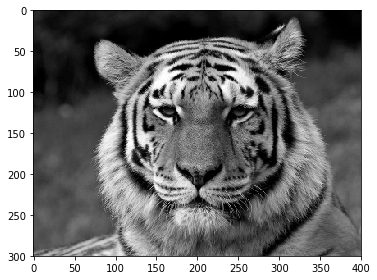

In [38]:
imshow(img)

In [39]:
gkernel=get_kernel(0.66)

In [40]:
# gauss=convolve2d(img, gkernel/gkernel.sum(), mode='valid').astype('uint8')
gauss=conv(img, gkernel/gkernel.sum()).astype('uint8')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


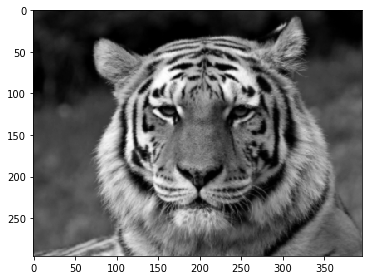

In [41]:
imshow(gauss,cmap='gray')

In [42]:
res=imread('https://stepik.org/media/attachments/lesson/61037/gaussian-tiger.png')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


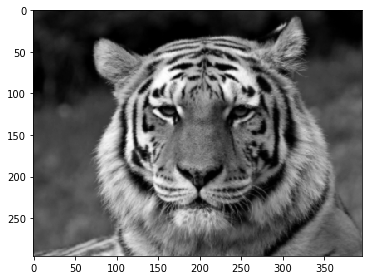

In [43]:
imshow(res)

In [44]:
array_equal(gauss,res)

True

### Повышение резкости изображения.
Реализуйте повышение четкости изображения путём фильтрации изображения.
При подсчете новых значений изображения не забывайте обрезать их с помощью numpy.clip. Дополнять изображение не нужно (т.е. изображение после фильтрации уменьшится). Прочитайте изображение из файла img.png и сохраните результат фильтрации в файл out_img.png.
В примере входа и выхода указаны ссылки на файлы. Скачав эти файлы, можно протестировать свою программу. Для сравнения вашего ответа с верным используйте функцию numpy.array_equal.

In [45]:
img=imread('https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


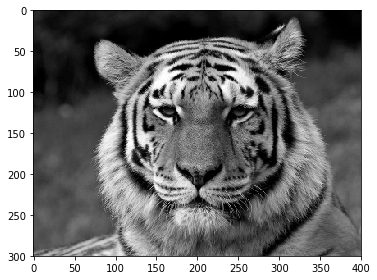

In [46]:
imshow(img)

In [47]:
kernel = np.array([[-1, -2, -1], 
                   [-2, 22, -2], 
                   [-1, -2, -1]]) / 10.

In [48]:
new=clip(conv(img, kernel),0,255).astype('uint8')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


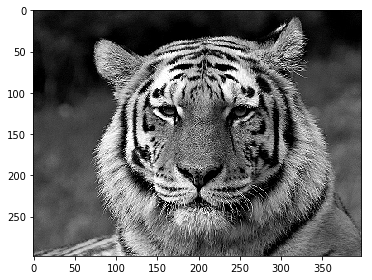

In [49]:
imshow(new)

In [50]:
res=imread('https://stepik.org/media/attachments/lesson/61037/unsharp-tiger.png')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


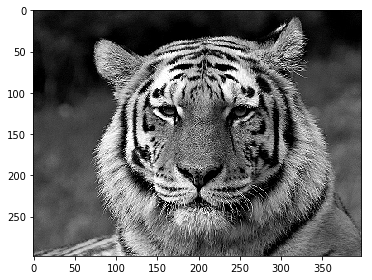

In [51]:
imshow(res)

In [52]:
array_equal(new,res)

True

### Медианный фильтр.

Реализуйте медианную фильтрацию изображения окном 7×7 пикселей. Дополнять изображение не нужно (т.е. изображение после фильтрации уменьшится). Прочитайте изображение из файла img.png и сохраните результат фильтрации в файл out_img.png.
В примере входа и выхода указаны ссылки на файлы. Скачав эти файлы, можно протестировать свою программу. Для сравнения вашего ответа с верным используйте функцию numpy.array_equal.

In [53]:
img=imread('https://stepik.org/media/attachments/lesson/61041/tiger-gray-small.png')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


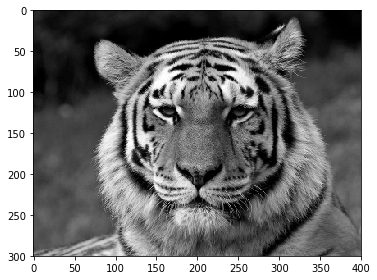

In [54]:
imshow(img)

In [55]:
new=np.zeros((img.shape[0], img.shape[1]), dtype=np.int)
for i in range (3,img.shape[0]-3):
    for j in range (3,img.shape[1]-3):
        new[i,j]=np.median(img[i-3:i+4,j-3:j+4])
new=new[3:img.shape[0]-3,3:img.shape[1]-3].astype('uint8')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


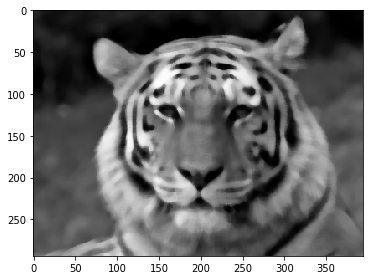

In [56]:
imshow(new)

In [60]:
res=imread('https://stepik.org/media/attachments/lesson/61041/median-tiger.png')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


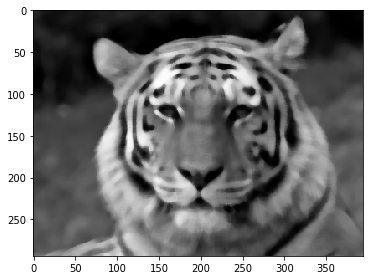

In [61]:
imshow(res)

In [62]:
array_equal(new,res)

True

## Фильтры

In [121]:
img=imread('https://stepik.org/media/attachments/lesson/60609/tiger-color.png')
img = rgb2gray(img)

In [122]:
img.shape

(600, 800)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


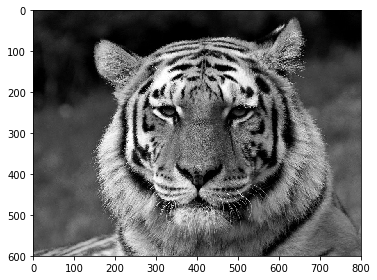

In [123]:
imshow(img)

### Стандартный фильтр для выделения скачков яркости 

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


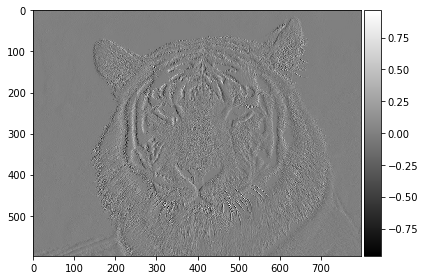

In [124]:
kernel=np.array([[0, 0, 0], 
                 [-1, 0, 1], 
                 [0, 0, 0]])
imshow(convolve2d(img, kernel, mode = "valid"),cmap='gray')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


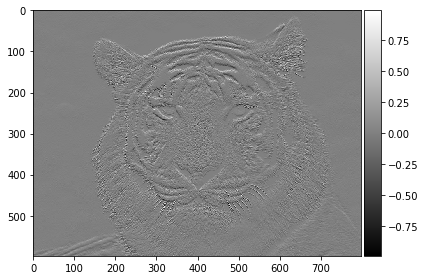

In [125]:
kernel=np.array([[0, 1, 0], 
                 [0, 0, 0], 
                 [0, -1, 0]])
imshow(convolve2d(img, kernel, mode = "valid"),cmap='gray')

### фильтр Превитта 

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


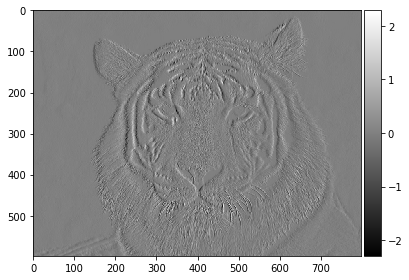

In [126]:
kernel=np.array([[-1, 0, 1], 
                 [-1, 0, 1], 
                 [-1, 0, 1]])
imshow(convolve2d(img, kernel, mode = "valid"),cmap='gray')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


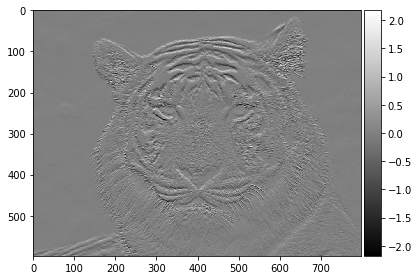

In [127]:
kernel=np.array([[1, 1, 1], 
                 [0, 0, 0], 
                 [-1, -1, -1]])
imshow(convolve2d(img, kernel, mode = "valid"),cmap='gray')

### фильтра Собеля

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


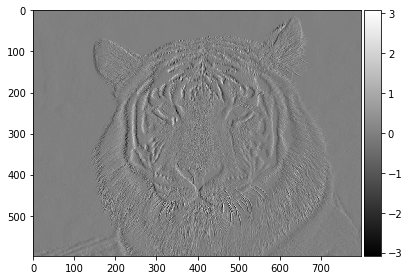

In [128]:
kernel=np.array([[-1, 0, 1], 
                 [-2, 0, 2], 
                 [-1, 0, 1]])
imshow(convolve2d(img, kernel, mode = "valid"),cmap='gray')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


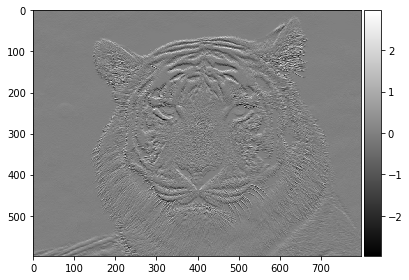

In [129]:
kernel=np.array([[1, 2, 1], 
                 [0, 0, 0], 
                 [-1, -2, -1]])
imshow(convolve2d(img, kernel, mode = "valid"),cmap='gray')

### Разностный аналог лапласиана 

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


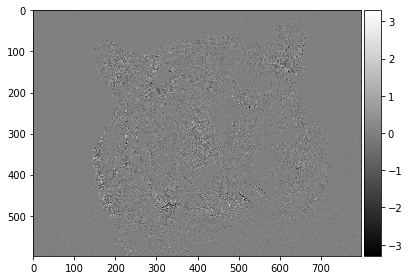

In [136]:
kernel = np.array([[0, 1, 0], 
                 [1, -4, 1], 
                 [0, 1, 0]])
imshow(convolve2d(img, kernel, mode = "valid"),cmap='gray')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


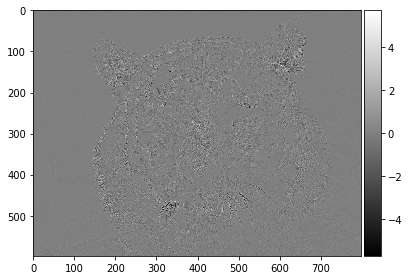

In [137]:
kernel = np.array([[1, 1, 1], 
                 [1, -8, 1], 
                 [1, 1, 1]])
imshow(convolve2d(img, kernel, mode = "valid"),cmap='gray')

### фильтра тиснения

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


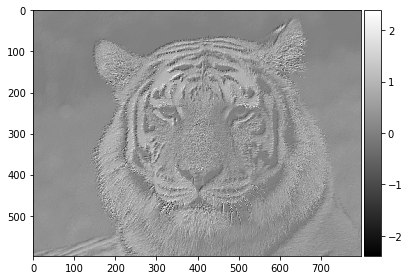

In [138]:
kernel = np.array([[-2, 0, 0], 
                     [0, 1, 0], 
                     [0, 0, 2]])
imshow(convolve2d(img, kernel, mode = "valid"),cmap='gray')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


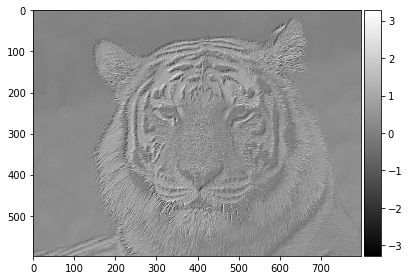

In [139]:
kernel = np.array([[-2, -1, 0], 
                     [-1, 1, 1], 
                     [0, 1, 2]])
imshow(convolve2d(img, kernel, mode = "valid"),cmap='gray')

### фильтр повышения контрастности

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


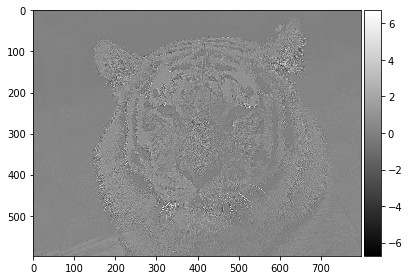

In [131]:
kernel=np.array([[-1, -1, -1], 
                 [-1,  9, -1], 
                 [-1, -1, -1]])
imshow(convolve2d(img, kernel, mode = "valid"),cmap='gray')

### фильтр размытия

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


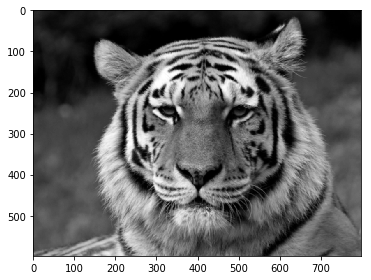

In [132]:
kernel=np.array([[1, 1, 1], 
                 [1, 1, 1], 
                 [1, 1, 1]])/9.
imshow(convolve2d(img, kernel, mode = "valid"),cmap='gray')

### фильтр Гаусса

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


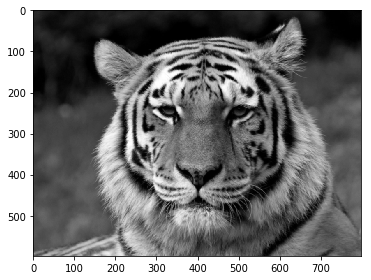

In [140]:
kernel=np.array([[1, 2, 1], 
                 [2, 4, 2], 
                 [1, 2, 1]])/16.
imshow(convolve2d(img, kernel, mode = "valid"),cmap='gray')